### Excercise 3.2
Exercise 3.2 Write a class called SawtoothChirp that extends Chirp and
overrides evaluate to generate a sawtooth waveform with frequency that increases (or decreases) linearly.
Hint: combine the evaluate functions from Chirp and SawtoothSignal.
Draw a sketch of what you think the spectrogram of this signal looks like, and
then plot it. The effect of aliasing should be visually apparent, and if you
listen carefully, you can hear it.

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [3]:
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

PI2 = 2 * np.pi

class SawtoothChirp(Chirp):
    """Represents a sawtooth signal with varying frequency."""

    def evaluate(self, ts):
        """Helper function that evaluates the signal.

        ts: float array of times
        """
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

In [4]:
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=4000)
wave.apodize()
wave.make_audio()

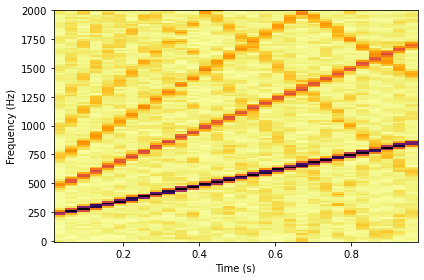

In [5]:
sp = wave.make_spectrogram(256)
sp.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

### Exercise 3.3
Exercise 3.3 Make a sawtooth chirp that sweeps from 2500 to 3000 Hz, then
use it to make a wave with duration 1 s and framerate 20 kHz. Draw a sketch
of what you think the spectrum will look like. Then plot the spectrum and
see if you got it right.

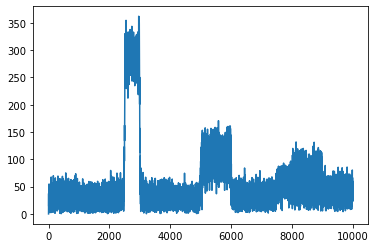

In [8]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
spectrum = wave.make_spectrum()
spectrum.plot()

### Exercise 3.4
Exercise 3.4 In musical terminology, a “glissando” is a note that slides from
one pitch to another, so it is similar to a chirp.
Find or make a recording of a glissando and plot a spectrogram of the first
few seconds. One suggestion: George Gershwin’s Rhapsody in Blue starts with
a famous clarinet glissando, which you can download from http://archive.
org/details/rhapblue11924.

In [9]:
if not os.path.exists('72475__rockwehrmann__glissup02.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/72475__rockwehrmann__glissup02.wav

In [11]:
from thinkdsp import read_wave

wave = read_wave('72475__rockwehrmann__glissup02.wav')

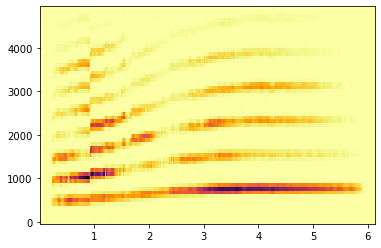

In [14]:
spectrogram = wave.make_spectrogram(seg_length=512)
spectrogram.plot(high = 5000)

### Exercise 3.5
Exercise 3.5 A trombone player can play a glissando by extending the trombone slide while blowing continuously. As the slide extends, the total length
of the tube gets longer, and the resulting pitch is inversely proportional to
length.
Assuming that the player moves the slide at a constant speed, how does frequency vary with time?
Write a class called TromboneGliss that extends Chirp and provides
evaluate. Make a wave that simulates a trombone glissando from C3 up
to F3 and back down to C3. C3 is 262 Hz; F3 is 349 Hz.
3.9. Exercises 35
Plot a spectrogram of the resulting wave. Is a trombone glissando more like a
linear or exponential chirp?

In [15]:
class TromboneGliss(Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths
        
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [16]:
f1 = 262
f2 = 349
signal = TromboneGliss(f1, f2)
wave1 = signal.make_wave(duration=1)
wave1.make_audio()

In [17]:
f3 = 262
f4 = 349
signal = TromboneGliss(f4, f3)
wave2 = signal.make_wave(duration=1)
wave2.make_audio()

In [20]:
wave = wave1 | wave2
wave.make_audio()

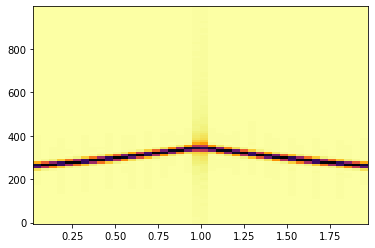

In [22]:
spectrogram = wave.make_spectrogram(1024)
spectrogram.plot(high=1000)

### Exercise 3.6
Exercise 3.6 Make or find a recording of a series of vowel sounds and look at
the spectrogram. Can you identify different vowels

In [23]:
if not os.path.exists('87778__marcgascon7__vocals.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/87778__marcgascon7__vocals.wav

In [24]:
wave = read_wave('87778__marcgascon7__vocals.wav')

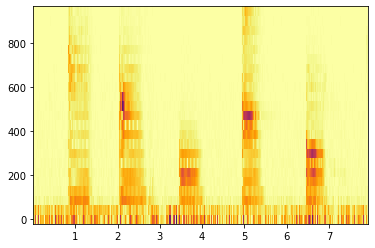

In [28]:
spectrogram = wave.make_spectrogram(1024)
spectrogram.plot(high=1000)

The stripe across the bottom is probably background noise.  The peaks in the spectrogram are called "formants".

In general, vowel sounds are distinguished by the amplitude ratios of the first two formants relative to the fundamental.  For more, see https://en.wikipedia.org/wiki/Formant

We can see the formats more clearly by selecting a segment during 'ah'.

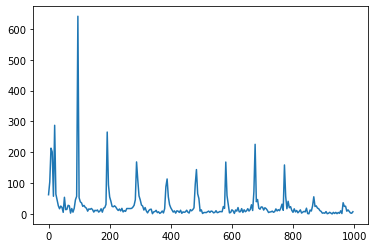

In [36]:
segment = wave.segment(start=1, duration=0.25)
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)